In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv as read
from sklearn.preprocessing import LabelEncoder
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import DBSCAN, KMeans
from sklearn.tree import plot_tree

In [2]:
class Solver:
    def __init__(self, data,y_name, lb_ecnoder_columns=[], dummies_columns=[]):
        self.data=copy.deepcopy(data)
        self.lb_ecnoder_columns = lb_ecnoder_columns
        self.dummies_columns = dummies_columns
        self.y_name = y_name
        self.X = pd.DataFrame()
        self.X_test = pd.DataFrame()
        self.X_train = pd.DataFrame()
        self.y = pd.DataFrame()
        self.y_test = pd.DataFrame()
        self.y_train = pd.DataFrame()
        self._data_prep()

        
    def _data_prep(self):
        #Подготовим данные (проработаем категориальные признаки, разобьем на тестовую и обучающую выборки)
        self._ecnoder(self.lb_ecnoder_columns)
        self.data = pd.get_dummies( self.data, columns = self.dummies_columns )
        self.y = self.data[self.y_name]
        self.X = copy.deepcopy(self.data)
        del self.X[self.y_name]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=666)
    def _ecnoder(self,lb_ecnoder_columns):
        for i in lb_ecnoder_columns:
            le = LabelEncoder()
            le.fit(self.data[i])
            self.data[i]=le.transform(self.data[i])

    def LinearRegression_model(self):
        model_name = 'LinearRegression'
        
        model = LinearRegression()
        
        #Обучаем модель
        model.fit(self.X_train, self.y_train)
        #Выводим точность
        print(f'R2 score of {model_name} = {model.score(self.X_test, self.y_test)}')
    def RND_model(self, max_depth=None):
        model_name = 'Random forest'
        model = DecisionTreeRegressor(max_depth=max_depth, random_state=73)
        model.fit(self.X_train, self.y_train)
        print(f'R2 score of {model_name} = {model.score(self.X_test, self.y_test)}')
        return model


In [3]:
data = fetch_california_housing(as_frame=True).data
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
data.info()
#Пустых значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [5]:
#Нормализуем признак с самыми большими значениями
from sklearn.preprocessing import MinMaxScaler
data['Population'] = MinMaxScaler().fit_transform(data[['Population']].values)

In [6]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,0.008941,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,0.067210,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,0.013818,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,0.015555,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,0.015752,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,0.023599,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,0.009894,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,0.028140,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,0.020684,2.123209,39.43,-121.32


In [7]:
sv = Solver(data=data, y_name='MedInc')

In [8]:
sv.LinearRegression_model()

R2 score of LinearRegression = 0.6065093618113575


In [9]:
RND=sv.RND_model()

R2 score of Random forest = 0.5802971464093177


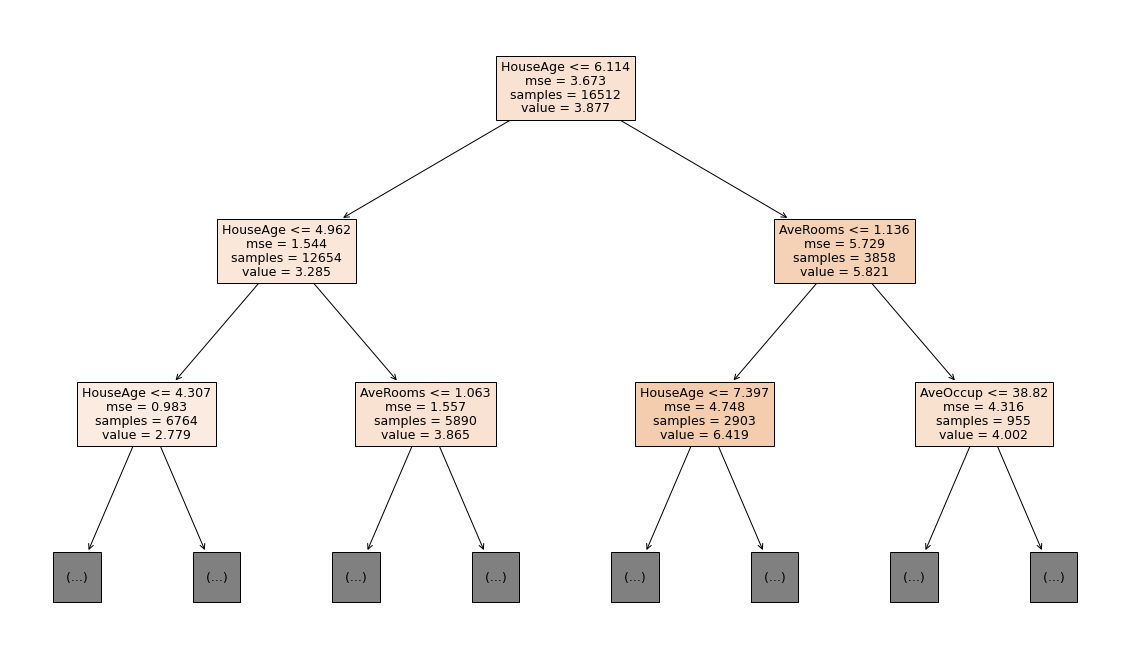

In [10]:
plt.figure(figsize=(20, 12))
plot_tree(RND, feature_names=data.columns, max_depth=2, filled=True);

In [11]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
x_clomuns=data.columns.drop('MedInc')
X=data[x_clomuns]
y=data['MedInc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
space = {
        'max_depth': hp.quniform('max_depth', 5, 50, 1)
        }

def objective(space):
    model = DecisionTreeRegressor(max_depth = space['max_depth'], random_state=73)
    model.fit(X_train, y_train)
    
    loss = 1-model.score(X_test, y_test)

    return {'loss': loss, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 100,
            trials= trials)
best

100%|██████████████████████████████████████████████| 100/100 [00:08<00:00, 11.33trial/s, best loss: 0.3341624827138282]


{'max_depth': 9.0}

In [12]:
RND=sv.RND_model(best['max_depth'])

R2 score of Random forest = 0.6658375172861718
